<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-DL-case-study/blob/MonkeyPox-detection/GoogleNet1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 2736 images belonging to 2 classes.
Found 684 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 803s 9s/step - accuracy: 0.6765 - loss: 1.3367 - val_accuracy: 0.7646 - val_loss: 0.5617
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 492s 6s/step - accuracy: 0.8935 - loss: 0.2777 - val_accuracy: 0.7573 - val_loss: 0.7516
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 482s 5s/step - accuracy: 0.9150 - loss: 0.2122 - val_accuracy: 0.7939 - val_loss: 0.5690
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 468s 5s/step - accuracy: 0.9266 - loss: 0.1794 - val_accuracy: 0.7778 - val_loss: 0.5233
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 478s 6s/step - accuracy: 0.9379 - loss: 0.1517 - val_accuracy: 0.7807 - val_loss: 0.6016
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 497s 5s/step - accuracy: 0.9551 - loss: 0.1173 - val_accuracy: 0.7208 - val_loss: 0.8504
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 495s 5s/step - accuracy: 0.9558 - loss: 0.1139 - val_accuracy: 0.7734 - val_loss: 0.6809
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 553s 6s/step - accuracy: 0.9559 - loss: 0.1096 - val_accuracy: 0.7485 - val_loss: 0.

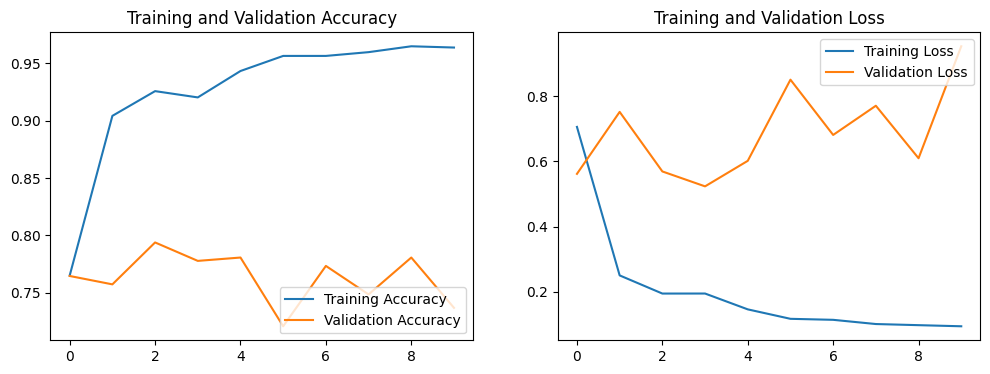

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Paths to the dataset
data_dir = "/content/drive/MyDrive/DATASET/Augmented Images"

# Initialize ImageDataGenerator for training, validation, and test sets
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
)

# Create generators for train, validation, and test sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify that this is the training set
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation set
)

# Load the InceptionV3 model pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base_model layers so they are not trained again
base_model.trainable = False

# Create a new model on top of it
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensions
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plot accuracy and loss curves
def plot_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot performance
plot_performance(history)

# Save the model
model.save("googlenet_model.h5")

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 28,103,464 (107.21 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,200,454 (16.02 MB)

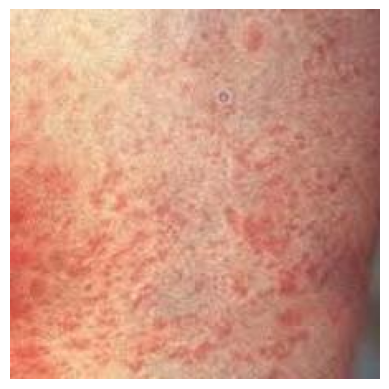

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: Other
Actual class: Other
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Others_augmented', 'NM19_01_04.jpg']


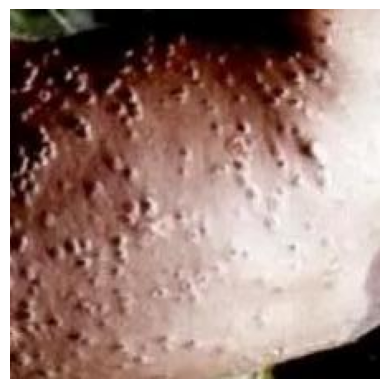

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted class: Monkeypox
Actual class: Monkeypox
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Monkeypox_augmented', 'M51_02_01.jpg']


'Monkeypox'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

def predict_image(image_path):
    # Load the image with target size
    img = load_img(image_path, target_size=(224, 224))  # Adjust target_size if needed
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the image
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Reshape for the model
    x = x / 255.0  # Normalize the image if needed by your model

    # Make the prediction
    prediction = model.predict(x)

    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Define class names based on the model's output layer
    class_names = ['Monkeypox', 'Other']

    # Get the name of the predicted class
    predicted_class_name = class_names[predicted_class_index]

    # Determine the actual class based on the folder name
    # Adjust the condition to match your folder structure
    if 'Monkeypox' in image_path:
        actual_class_name = 'Monkeypox'
    else:
        actual_class_name = 'Other'  # Adjust this if there are other classes

    # Print the predicted and actual class names
    print(f"Predicted class: {predicted_class_name}")
    print(f"Actual class: {actual_class_name}")
    print("Path parts:", image_path.split('/'))

    return predicted_class_name

# Test the function with the provided paths
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Others_augmented/NM19_01_04.jpg")
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Monkeypox_augmented/M51_02_01.jpg")

Accuracy: 80.00%


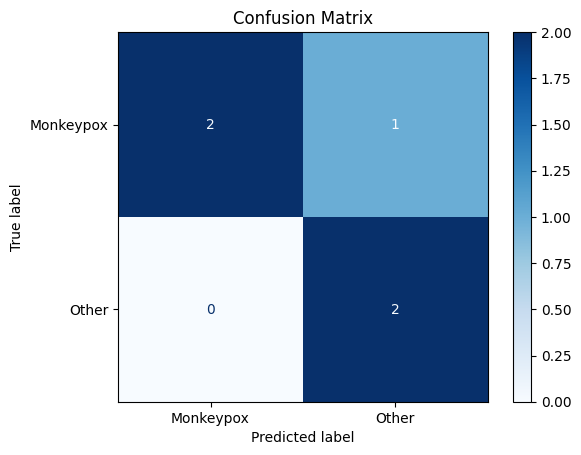

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Sample true labels and predicted labels
# Replace these with your actual data
true_labels = ['Monkeypox', 'Other', 'Monkeypox', 'Other', 'Monkeypox']  # Example true labels
predicted_labels = ['Monkeypox', 'Other', 'Other', 'Other', 'Monkeypox']  # Example predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Monkeypox', 'Other'])

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Monkeypox', 'Other'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()